# Assignment 2 - part 2

## Convolutional neural network

Use the training and evaluation pipeline developed in part 1 to train and evaluate two CNN models.
The first shall be composed of standard convolutional layers, non-linaerities, and pooling layers of your choice. The second shall include skip connections. For this you shall develop your own ResidualBlack as a new layer under the nn.Module super-class. 

### Train and apply model

Train the two models. Try different values of the hyper-paramter settings. You shall achieve at least 93% test accuracy with your best model.

Describe briefly your two models and your hyper-parameter setups and comment your results.

**Compare the performance of the two models and the three feed forward models using suitable supportive tables and graphs, and complemented by relevant comments.**


In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
import numpy as np
from utilscnn import StandardCNN, train_cnn_model, plot_loss ,plot_accuracy ,SkipConnectionsCNN

In [2]:
# Data augmentation and loading
# Define data transformations for training
transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalization
])

In [3]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
# Define models
standard_cnn_model = StandardCNN()
skip_connections_cnn_model = SkipConnectionsCNN()
num_epochs = 30

In [5]:
# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizers
standard_cnn_optimizer = optim.Adam(standard_cnn_model.parameters(), lr=0.001)
skip_connections_optimizer = optim.Adam(skip_connections_cnn_model.parameters(), lr=0.001)

In [6]:
# Train the standard CNN model
standard_cnn_model, standard_train_loss, standard_train_accuracy, standard_test_loss, standard_test_accuracy = train_cnn_model(
    standard_cnn_model, train_loader, test_loader, criterion, standard_cnn_optimizer, num_epochs)
    

Epoch [1/30], Train Loss: 0.5586, Train Accuracy: 0.8158, Test Loss: 0.1040, Test Accuracy: 0.9683
Epoch [2/30], Train Loss: 0.1807, Train Accuracy: 0.9511, Test Loss: 0.0795, Test Accuracy: 0.9772
Epoch [3/30], Train Loss: 0.1393, Train Accuracy: 0.9637, Test Loss: 0.0606, Test Accuracy: 0.9813
Epoch [4/30], Train Loss: 0.1249, Train Accuracy: 0.9665, Test Loss: 0.0545, Test Accuracy: 0.9832
Epoch [5/30], Train Loss: 0.1146, Train Accuracy: 0.9704, Test Loss: 0.0516, Test Accuracy: 0.9835
Epoch [6/30], Train Loss: 0.1017, Train Accuracy: 0.9736, Test Loss: 0.0446, Test Accuracy: 0.9872
Epoch [7/30], Train Loss: 0.0966, Train Accuracy: 0.9744, Test Loss: 0.0401, Test Accuracy: 0.9874
Epoch [8/30], Train Loss: 0.0958, Train Accuracy: 0.9754, Test Loss: 0.0437, Test Accuracy: 0.9869
Epoch [9/30], Train Loss: 0.0882, Train Accuracy: 0.9769, Test Loss: 0.0424, Test Accuracy: 0.9863
Epoch [10/30], Train Loss: 0.0878, Train Accuracy: 0.9767, Test Loss: 0.0361, Test Accuracy: 0.9889
Epoch [11

In [7]:
    
# Train the skip connections CNN model
skip_connections_cnn_model, skip_train_loss, skip_train_accuracy, skip_test_loss, skip_test_accuracy = train_cnn_model(
    skip_connections_cnn_model, train_loader, test_loader, criterion, skip_connections_optimizer, num_epochs)

Epoch [1/30], Train Loss: 0.2412, Train Accuracy: 0.9316, Test Loss: 0.0741, Test Accuracy: 0.9783
Epoch [2/30], Train Loss: 0.1069, Train Accuracy: 0.9725, Test Loss: 0.0528, Test Accuracy: 0.9842
Epoch [3/30], Train Loss: 0.0808, Train Accuracy: 0.9782, Test Loss: 0.0546, Test Accuracy: 0.9831
Epoch [4/30], Train Loss: 0.0698, Train Accuracy: 0.9817, Test Loss: 0.0495, Test Accuracy: 0.9860
Epoch [5/30], Train Loss: 0.0665, Train Accuracy: 0.9826, Test Loss: 0.0386, Test Accuracy: 0.9881
Epoch [6/30], Train Loss: 0.0572, Train Accuracy: 0.9852, Test Loss: 0.0442, Test Accuracy: 0.9867
Epoch [7/30], Train Loss: 0.0538, Train Accuracy: 0.9858, Test Loss: 0.0366, Test Accuracy: 0.9890
Epoch [8/30], Train Loss: 0.0507, Train Accuracy: 0.9863, Test Loss: 0.0357, Test Accuracy: 0.9888
Epoch [9/30], Train Loss: 0.0464, Train Accuracy: 0.9878, Test Loss: 0.0513, Test Accuracy: 0.9865
Epoch [10/30], Train Loss: 0.0438, Train Accuracy: 0.9883, Test Loss: 0.0334, Test Accuracy: 0.9904
Epoch [11

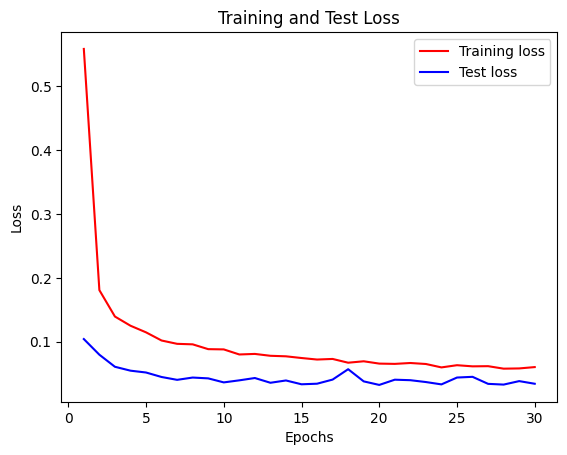

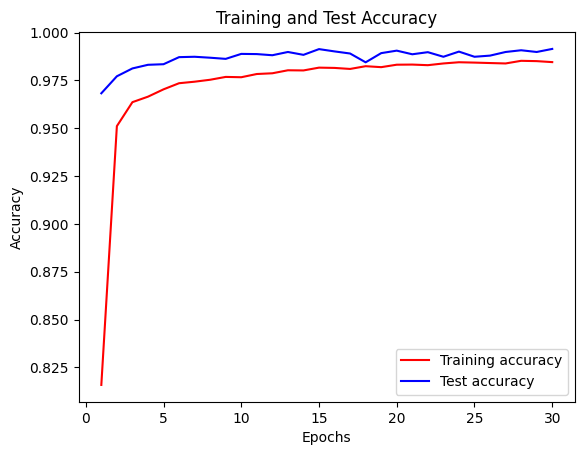

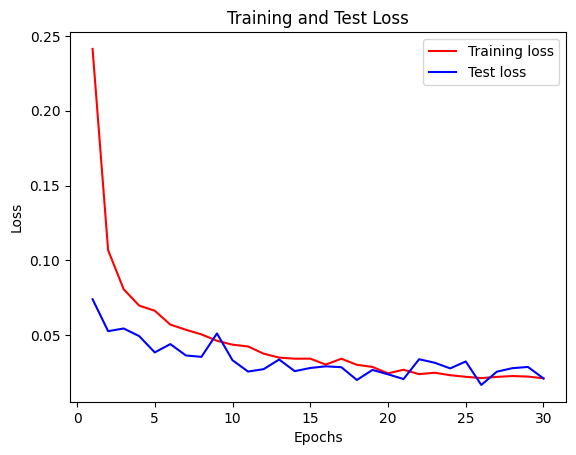

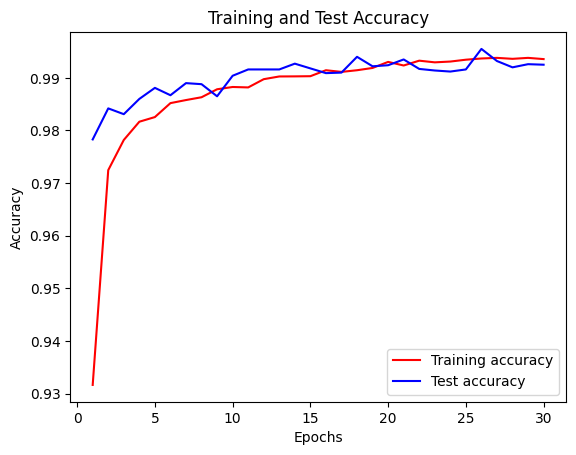

In [8]:
# Plotting the results
plot_loss(standard_train_loss, standard_test_loss)
plot_accuracy(standard_train_accuracy, standard_test_accuracy)

plot_loss(skip_train_loss, skip_test_loss)
plot_accuracy(skip_train_accuracy, skip_test_accuracy)


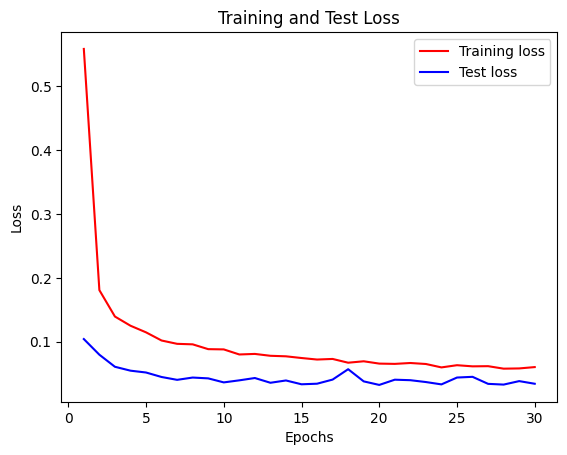

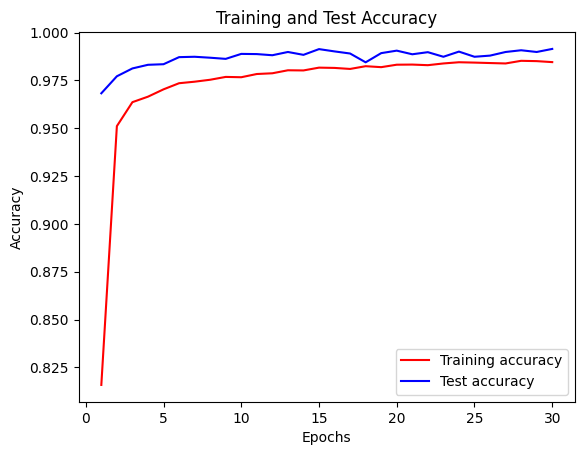

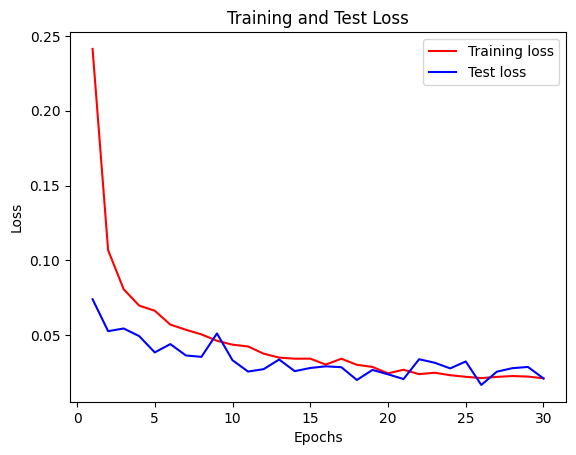

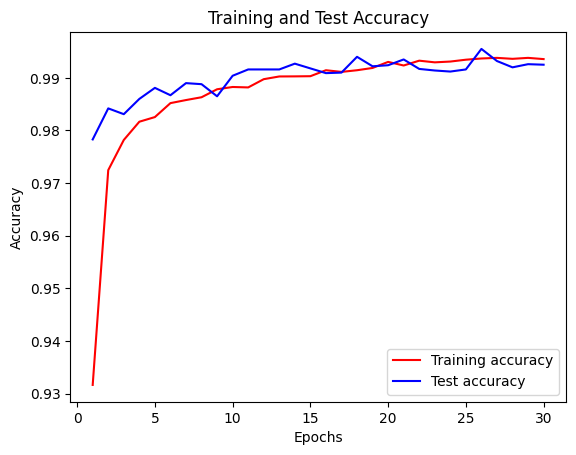

Standard CNN Test Accuracy: 0.9915
Skip Connections CNN Test Accuracy: 0.9925


In [9]:
# Plotting the results
plot_loss(standard_train_loss, standard_test_loss)
plot_accuracy(standard_train_accuracy, standard_test_accuracy)

plot_loss(skip_train_loss, skip_test_loss)
plot_accuracy(skip_train_accuracy, skip_test_accuracy)

# Compare final test accuracies
print(f"Standard CNN Test Accuracy: {standard_test_accuracy[-1]:.4f}")
print(f"Skip Connections CNN Test Accuracy: {skip_test_accuracy[-1]:.4f}")

P-value for test accuracy comparison: 0.0000


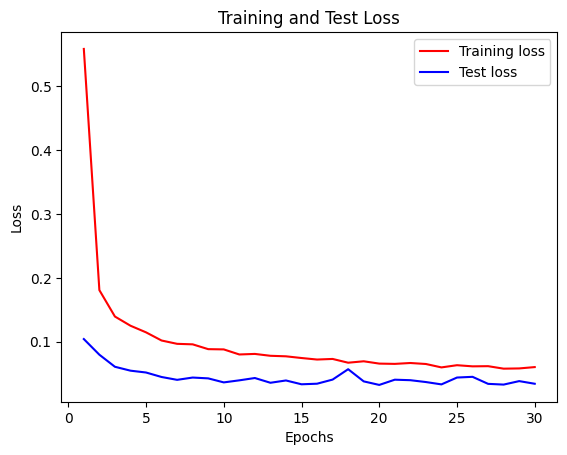

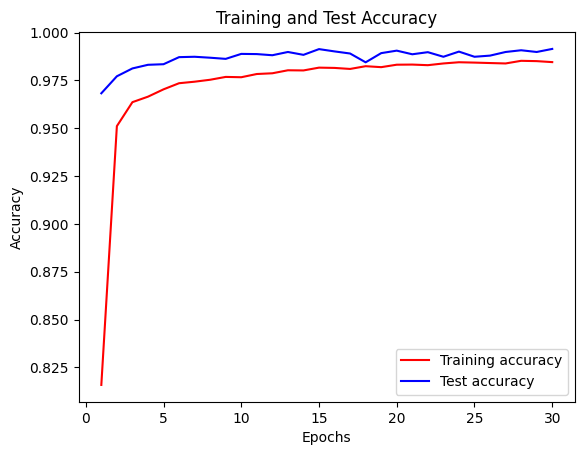

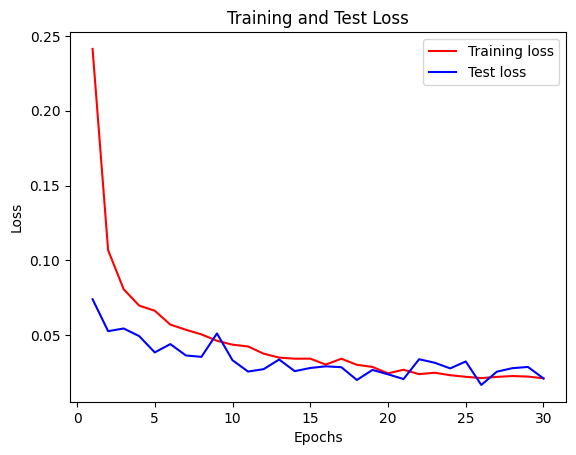

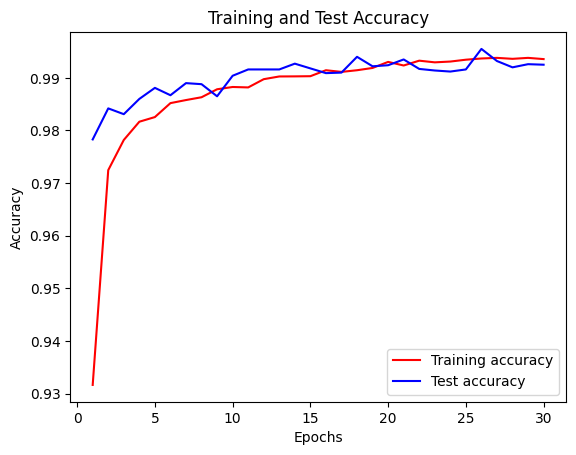

In [10]:
from scipy.stats import ttest_rel

# Perform statistical comparison (paired t-test)
t_stat, p_value = ttest_rel(standard_test_accuracy, skip_test_accuracy)
print(f"P-value for test accuracy comparison: {p_value:.4f}")

# Plotting the results (functions for plotting not shown here but should be defined)
plot_loss(standard_train_loss, standard_test_loss)
plot_accuracy(standard_train_accuracy, standard_test_accuracy)
plot_loss(skip_train_loss, skip_test_loss)
plot_accuracy(skip_train_accuracy, skip_test_accuracy)